# Breast Cancer Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###  Load and transform the dataset to a Pandas data frame

In [2]:
bc_data= pd.read_csv('../data/data.csv')
bc_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Exploratory Data Analysis 

In [3]:
bc_data.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [7]:
bc_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
bc_data=bc_data.drop(["Unnamed: 32","id"],axis=1)

In [8]:
diagnosis_mapping = {"M": 1, "B": 0}

bc_data["diagnosis"] = bc_data["diagnosis"].map(diagnosis_mapping)

#### Handle missing values with K-Nearest Neighbors (KNN) imputation

In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

bc_data['AgeAtMenopause'] = imputer.fit_transform(bc_data[['AgeAtMenopause']])
bc_data['AgeAtMenopause'] = bc_data['AgeAtMenopause'].astype(int)

In [6]:
bc_data

,SubjectNo,PatientID,Age,Weight,Height,Parity,NoOfChildren,MenopausalStatus,AgeAtMenarche,AgeAtMenopause,UseOfHRT,FamilyHystory,Binary
0,1,CP_01,40,50.00,1.65,Parouse,2,Premenopausal,13,48,No,No,0
1,2,CP_02,55,70.20,1.58,Parouse,3,Postmenopausal,14,42,No,No,0
2,3,CP_03,51,41.25,1.46,Parouse,2,Premenopausal,14,48,No,No,1
3,4,CP_04,45,70.50,1.64,Parouse,1,Premenopausal,14,48,No,No,1
4,5,CP_05,50,60.90,1.49,Parouse,3,Premenopausal,12,48,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,NW_42,65,70.00,1.50,Parouse,2,Postmenopausal,13,51,No,No,0
239,240,NW_43,55,56.00,1.52,Nulliparouse,0,Postmenopausal,12,41,No,No,0
240,241,NW_44,40,65.00,1.48,Parouse,2,Postmenopausal,12,35,No,No,0
241,242,NW_45,45,53.00,1.40,Parouse,3,Premenopausal,12,48,Yes,No,1


#### Delete unnecessary columns

In [7]:
columns_to_delete = ['SubjectNo', 'PatientID']
bc_data = bc_data.drop(columns=columns_to_delete)

In [8]:
bc_data

,Age,Weight,Height,Parity,NoOfChildren,MenopausalStatus,AgeAtMenarche,AgeAtMenopause,UseOfHRT,FamilyHystory,Binary
0,40,50.00,1.65,Parouse,2,Premenopausal,13,48,No,No,0
1,55,70.20,1.58,Parouse,3,Postmenopausal,14,42,No,No,0
2,51,41.25,1.46,Parouse,2,Premenopausal,14,48,No,No,1
3,45,70.50,1.64,Parouse,1,Premenopausal,14,48,No,No,1
4,50,60.90,1.49,Parouse,3,Premenopausal,12,48,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...
238,65,70.00,1.50,Parouse,2,Postmenopausal,13,51,No,No,0
239,55,56.00,1.52,Nulliparouse,0,Postmenopausal,12,41,No,No,0
240,40,65.00,1.48,Parouse,2,Postmenopausal,12,35,No,No,0
241,45,53.00,1.40,Parouse,3,Premenopausal,12,48,Yes,No,1


In [9]:
bc_data.count()

Age                 243
Weight              243
Height              243
Parity              243
NoOfChildren        243
MenopausalStatus    243
AgeAtMenarche       243
AgeAtMenopause      243
UseOfHRT            243
FamilyHystory       243
Binary              243
dtype: int64

### Data encoding using One-hot encoding

In [10]:
bc_data = pd.get_dummies(bc_data, columns=['Parity','MenopausalStatus'])

# Rename the columns to 'Parity_Parouse' and 'Parity_Nulliparouse'
bc_data.rename(columns={'Parity_Parouse': 'Parity_Parouse', 'Parity_Nulliparouse': 'Parity_Nulliparouse'}, inplace=True)
bc_data.rename(columns={'MenopausalStatus_Premenopausal': 'MenopausalStatus_Premenopausal', 'MenopausalStatus_Postmenopausal': 'MenopausalStatus_Postmenopausal'}, inplace=True)

# Convert data type to integer
bc_data['Parity_Parouse'] = bc_data['Parity_Parouse'].astype(int)
bc_data['Parity_Nulliparouse'] = bc_data['Parity_Nulliparouse'].astype(int)

bc_data['MenopausalStatus_Premenopausal'] = bc_data['MenopausalStatus_Premenopausal'].astype(int)
bc_data['MenopausalStatus_Postmenopausal'] = bc_data['MenopausalStatus_Postmenopausal'].astype(int)

print(bc_data)

     Age  Weight  Height  NoOfChildren  AgeAtMenarche  AgeAtMenopause  \
0     40   50.00    1.65             2             13              48   
1     55   70.20    1.58             3             14              42   
2     51   41.25    1.46             2             14              48   
3     45   70.50    1.64             1             14              48   
4     50   60.90    1.49             3             12              48   
..   ...     ...     ...           ...            ...             ...   
238   65   70.00    1.50             2             13              51   
239   55   56.00    1.52             0             12              41   
240   40   65.00    1.48             2             12              35   
241   45   53.00    1.40             3             12              48   
242   44   52.00    1.60             2             14              48   

    UseOfHRT FamilyHystory  Binary  Parity_Nulliparouse  Parity_Parouse  \
0         No            No       0              

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
bc_data['UseOfHRT'] = label_encoder.fit_transform(bc_data['UseOfHRT'])
bc_data['FamilyHystory'] = label_encoder.fit_transform(bc_data['FamilyHystory'])

In [12]:
bc_data = bc_data[['Age', 'Weight', 'Height', 'NoOfChildren', 'AgeAtMenarche', 'AgeAtMenopause',
         'Parity_Nulliparouse', 'Parity_Parouse', 'MenopausalStatus_Postmenopausal',
         'MenopausalStatus_Premenopausal', 'UseOfHRT','FamilyHystory','Binary']]

In [13]:
bc_data

,Age,Weight,Height,NoOfChildren,AgeAtMenarche,AgeAtMenopause,Parity_Nulliparouse,Parity_Parouse,MenopausalStatus_Postmenopausal,MenopausalStatus_Premenopausal,UseOfHRT,FamilyHystory,Binary
0,40,50.00,1.65,2,13,48,0,1,0,1,0,0,0
1,55,70.20,1.58,3,14,42,0,1,1,0,0,0,0
2,51,41.25,1.46,2,14,48,0,1,0,1,0,0,1
3,45,70.50,1.64,1,14,48,0,1,0,1,0,0,1
4,50,60.90,1.49,3,12,48,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,65,70.00,1.50,2,13,51,0,1,1,0,0,0,0
239,55,56.00,1.52,0,12,41,1,0,1,0,0,0,0
240,40,65.00,1.48,2,12,35,0,1,1,0,0,0,0
241,45,53.00,1.40,3,12,48,0,1,0,1,1,0,1


In [14]:
bc_data.isnull().sum()

Age                                0
Weight                             0
Height                             0
NoOfChildren                       0
AgeAtMenarche                      0
AgeAtMenopause                     0
Parity_Nulliparouse                0
Parity_Parouse                     0
MenopausalStatus_Postmenopausal    0
MenopausalStatus_Premenopausal     0
UseOfHRT                           0
FamilyHystory                      0
Binary                             0
dtype: int64

### "Synthetic Minority Oversampling Technique" (SMOTE) to mitigate the data imbalance

In [15]:
from imblearn.over_sampling import SMOTE

# Separate the target variable from the features
X = bc_data.drop('Binary', axis=1)
y = bc_data['Binary']

# Create a SMOTE object
smote = SMOTE(sampling_strategy='auto')

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the balance of the resampled data
print(y_resampled.value_counts())

Binary
0    198
1    198
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [13]:
y=bc_data.diagnosis
X=bc_data.drop("diagnosis",axis=1)

### Scaling data

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame
scaler = MinMaxScaler()

# Select the columns you want to normalize
columns_to_normalize = ['Weight', 'Height', 'Age', 'AgeAtMenarche', 'AgeAtMenopause']

# Apply Min-Max scaling to the selected columns
bc_data[columns_to_normalize] = scaler.fit_transform(bc_data[columns_to_normalize])

In [18]:
bc_data

,Age,Weight,Height,NoOfChildren,AgeAtMenarche,AgeAtMenopause,Parity_Nulliparouse,Parity_Parouse,MenopausalStatus_Postmenopausal,MenopausalStatus_Premenopausal,UseOfHRT,FamilyHystory,Binary
0,0.116279,0.237577,0.558442,2,0.375,0.590909,0,1,0,1,0,0,0
1,0.465116,0.512594,0.467532,3,0.500,0.318182,0,1,1,0,0,0,0
2,0.372093,0.118448,0.311688,2,0.500,0.590909,0,1,0,1,0,0,1
3,0.232558,0.516678,0.545455,1,0.500,0.590909,0,1,0,1,0,0,1
4,0.348837,0.385977,0.350649,3,0.250,0.590909,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.697674,0.509871,0.363636,2,0.375,0.727273,0,1,1,0,0,0,0
239,0.465116,0.319265,0.389610,0,0.250,0.272727,1,0,1,0,0,0,0
240,0.116279,0.441797,0.337662,2,0.250,0.000000,0,1,1,0,0,0,0
241,0.232558,0.278421,0.233766,3,0.250,0.590909,0,1,0,1,1,0,1


In [19]:
X_test

,Age,Weight,Height,NoOfChildren,AgeAtMenarche,AgeAtMenopause,Parity_Nulliparouse,Parity_Parouse,MenopausalStatus_Postmenopausal,MenopausalStatus_Premenopausal,UseOfHRT,FamilyHystory
78,42,71.850000,1.560000,3,12,48,0,1,0,1,0,1
277,39,60.950846,1.520000,1,12,48,0,1,0,1,0,0
250,50,61.094510,1.485871,2,12,48,0,1,0,1,0,0
55,40,50.100000,1.550000,2,16,48,0,1,0,1,0,0
391,49,66.266156,1.572779,1,13,48,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,61,72.600000,1.580000,2,13,48,0,1,1,0,0,0
114,63,53.450000,1.450000,3,12,52,0,1,1,0,0,0
3,45,70.500000,1.640000,1,14,48,0,1,0,1,0,0
18,50,49.800000,1.520000,2,16,43,0,1,1,0,0,0


In [20]:
y_train

337    1
175    0
63     0
247    1
227    0
      ..
71     0
106    1
270    1
348    1
102    0
Name: Binary, Length: 316, dtype: int64

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [16]:
import sklearn.metrics as metrics

lr_classifier = LogisticRegression(max_iter=1000)
desc = lr_classifier.fit(X_train, y_train)
print(desc)
y_pred = lr_classifier.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

LogisticRegression(max_iter=1000)
[[73  2]
 [ 1 38]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\Users\Sathira\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
import sklearn.metrics as metrics

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:\n', metrics.accuracy_score(y_test, y_pred))
    print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
    print('Classification report:\n', metrics.classification_report(y_test, y_pred, digits=4))
    print('Precision:\n',metrics.precision_score(y_test, y_pred))
    print('Recall:\n',metrics.recall_score(y_test, y_pred))

In [24]:
new_data = np.array([[40,70.110,1.15,2,16,51,1,1,1,1,1,0]])

print(lr_classifier.predict(new_data))
print(lr_classifier.predict_proba(new_data))

[0]
[[0.99781069 0.00218931]]


C:\Users\Sathira\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Sathira\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Hyperparameter tuning for Logistic Regression (Solver, C and Penalty)

In [20]:
lr_classifier = LogisticRegression()
lr_C = np.array([0.01, 0.1, 1, 10, 100])
lr_penalty = ['l2']  #'l1', 'elasticnet'
lr_solver = ['lbfgs'] #'liblinear', 'sag'

grid_values = {'C': lr_C, 'penalty': lr_penalty, 'solver': lr_solver}
cross_validation = KFold(n_splits=5, shuffle=False)
lrc_grid = GridSearchCV(lr_classifier, param_grid=grid_values, 
                        cv=cross_validation, n_jobs=-1, scoring='f1_macro')

desc = lrc_grid.fit(X_train, y_train)
print(desc)
print_model_performance(lrc_grid, X_test, y_test)

print("\n The best parameters across ALL searched params:\n",lrc_grid.best_params_)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='f1_macro')
Accuracy score:
 0.9473684210526315
Confusion matrix:
 [[72  3]
 [ 3 36]]
Classification report:
               precision    recall  f1-score   support

           0     0.9600    0.9600    0.9600        75
           1     0.9231    0.9231    0.9231        39

    accuracy                         0.9474       114
   macro avg     0.9415    0.9415    0.9415       114
weighted avg     0.9474    0.9474    0.9474       114

Precision:
 0.9230769230769231
Recall:
 0.9230769230769231

 The best parameters across ALL searched params:
 {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\Sathira\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-Nearest Neighbors (KNN)

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)

desc = knn_classifier.fit(X_train, y_train)
print(desc)
print_model_performance(knn_classifier, X_test, y_test)

KNeighborsClassifier(n_neighbors=4)


AttributeError: 'Flags' object has no attribute 'c_contiguous'

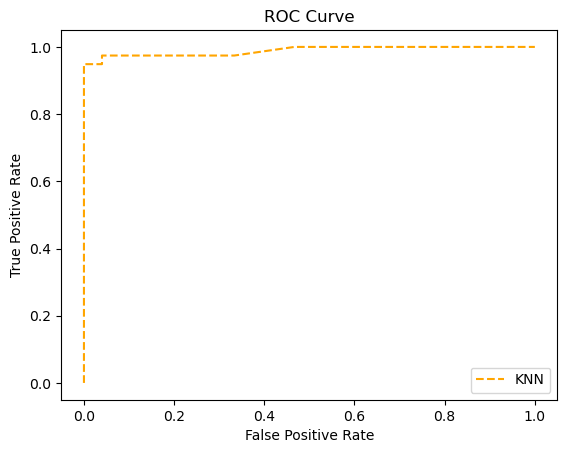

In [31]:
from sklearn.metrics import roc_curve

pred_prob = rf_classifier.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

plt.plot(fpr, tpr, linestyle='--',color='orange', label='KNN')

# title
plt.title('ROC Curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Suppot Vector Machine (SVM)

In [22]:
from sklearn import svm
svm_classifier = svm.SVC() #default kernal is Radial Basis Function (RBF) kernel.

svm_classifier.fit(X_train, y_train)
print_model_performance(svm_classifier, X_test, y_test)

Accuracy score:
 0.9298245614035088
Confusion matrix:
 [[72  3]
 [ 5 34]]
Classification report:
               precision    recall  f1-score   support

           0     0.9351    0.9600    0.9474        75
           1     0.9189    0.8718    0.8947        39

    accuracy                         0.9298       114
   macro avg     0.9270    0.9159    0.9211       114
weighted avg     0.9295    0.9298    0.9294       114

Precision:
 0.918918918918919
Recall:
 0.8717948717948718


#### Hyperparameter tuning for Logistic Regression (rbf, linear and poly)

In [25]:
import sklearn.metrics as metrics

for C in [1, 10, 100, 1000, 10000]:
    for kernal in ['rbf', 'linear', 'poly']:
        svm_classifier = svm.SVC(C=C, kernel=kernal) #similarly, gamma=0.01, 0.5, 
        svm_classifier.fit(X_train, y_train)
        y_pred = svm_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'C={C:<10} kernal={kernal:<10} accuracy score={scores: .2%}')

C=1          kernal=rbf        accuracy score= 92.98%
C=1          kernal=linear     accuracy score= 94.74%
C=1          kernal=poly       accuracy score= 91.23%
C=10         kernal=rbf        accuracy score= 93.86%
C=10         kernal=linear     accuracy score= 96.49%
C=10         kernal=poly       accuracy score= 92.98%
C=100        kernal=rbf        accuracy score= 96.49%
C=100        kernal=linear     accuracy score= 96.49%
C=100        kernal=poly       accuracy score= 95.61%
C=1000       kernal=rbf        accuracy score= 96.49%
C=1000       kernal=linear     accuracy score= 95.61%
C=1000       kernal=poly       accuracy score= 95.61%
C=10000      kernal=rbf        accuracy score= 97.37%
C=10000      kernal=linear     accuracy score= 95.61%
C=10000      kernal=poly       accuracy score= 96.49%


### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state=17)   
dt_classifier.fit(X_train,y_train)

print(dt_classifier)
print_model_performance(dt_classifier, X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
Accuracy score:
 0.9385964912280702
Confusion matrix:
 [[71  4]
 [ 3 36]]
Classification report:
               precision    recall  f1-score   support

           0     0.9595    0.9467    0.9530        75
           1     0.9000    0.9231    0.9114        39

    accuracy                         0.9386       114
   macro avg     0.9297    0.9349    0.9322       114
weighted avg     0.9391    0.9386    0.9388       114

Precision:
 0.9
Recall:
 0.9230769230769231


#### Hyperparameter tuning for Decision Tree (gini, entropy)

In [28]:
#Hyperparameter training with iterations
import sklearn.metrics as metrics

for md in range(1, 11, 1):
    for crt in ['gini', 'entropy']:
        dt_classifier = DecisionTreeClassifier(criterion=crt, max_depth=md, random_state=17)   
        dt_classifier.fit(X_train,y_train)
        y_pred = dt_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'k={md:<4} criterion={crt:<10} accuracy score={scores: .2%}')

k=1    criterion=gini       accuracy score= 90.35%
k=1    criterion=entropy    accuracy score= 86.84%
k=2    criterion=gini       accuracy score= 90.35%
k=2    criterion=entropy    accuracy score= 92.11%
k=3    criterion=gini       accuracy score= 93.86%
k=3    criterion=entropy    accuracy score= 92.98%
k=4    criterion=gini       accuracy score= 96.49%
k=4    criterion=entropy    accuracy score= 89.47%
k=5    criterion=gini       accuracy score= 96.49%
k=5    criterion=entropy    accuracy score= 90.35%
k=6    criterion=gini       accuracy score= 97.37%
k=6    criterion=entropy    accuracy score= 93.86%
k=7    criterion=gini       accuracy score= 94.74%
k=7    criterion=entropy    accuracy score= 93.86%
k=8    criterion=gini       accuracy score= 94.74%
k=8    criterion=entropy    accuracy score= 93.86%
k=9    criterion=gini       accuracy score= 94.74%
k=9    criterion=entropy    accuracy score= 93.86%
k=10   criterion=gini       accuracy score= 94.74%
k=10   criterion=entropy    acc

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
print_model_performance(rf_classifier, X_test, y_test)

Accuracy score:
 0.9649122807017544
Confusion matrix:
 [[72  3]
 [ 1 38]]
Classification report:
               precision    recall  f1-score   support

           0     0.9863    0.9600    0.9730        75
           1     0.9268    0.9744    0.9500        39

    accuracy                         0.9649       114
   macro avg     0.9566    0.9672    0.9615       114
weighted avg     0.9660    0.9649    0.9651       114

Precision:
 0.926829268292683
Recall:
 0.9743589743589743


#### Hyperparameter tuning for Random Forest Classifier (gini, entropy)

In [30]:
for md in range(1, 15, 1):
    for crt in ['gini', 'entropy']:
        rf_classifier = RandomForestClassifier(criterion=crt, max_depth=md)
        rf_classifier.fit(X_train, y_train)
        y_pred = rf_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'k={md:<4} criterion={crt:<10} accuracy score={scores: .3%}')

k=1    criterion=gini       accuracy score= 92.982%
k=1    criterion=entropy    accuracy score= 92.982%
k=2    criterion=gini       accuracy score= 93.860%
k=2    criterion=entropy    accuracy score= 93.860%
k=3    criterion=gini       accuracy score= 94.737%
k=3    criterion=entropy    accuracy score= 94.737%
k=4    criterion=gini       accuracy score= 94.737%
k=4    criterion=entropy    accuracy score= 95.614%
k=5    criterion=gini       accuracy score= 95.614%
k=5    criterion=entropy    accuracy score= 96.491%
k=6    criterion=gini       accuracy score= 96.491%
k=6    criterion=entropy    accuracy score= 95.614%
k=7    criterion=gini       accuracy score= 96.491%
k=7    criterion=entropy    accuracy score= 96.491%
k=8    criterion=gini       accuracy score= 95.614%
k=8    criterion=entropy    accuracy score= 96.491%
k=9    criterion=gini       accuracy score= 95.614%
k=9    criterion=entropy    accuracy score= 94.737%
k=10   criterion=gini       accuracy score= 95.614%
k=10   crite

### Neural Network Classifier ###

In [32]:
from sklearn import neural_network

nn_classifier = neural_network.MLPClassifier(max_iter=50000)
nn_classifier.fit(X_train, y_train)
y_pred = nn_classifier.predict(X_test)
print_model_performance(nn_classifier, X_test, y_test)

Accuracy score:
 0.9385964912280702
Confusion matrix:
 [[71  4]
 [ 3 36]]
Classification report:
               precision    recall  f1-score   support

           0     0.9595    0.9467    0.9530        75
           1     0.9000    0.9231    0.9114        39

    accuracy                         0.9386       114
   macro avg     0.9297    0.9349    0.9322       114
weighted avg     0.9391    0.9386    0.9388       114

Precision:
 0.9
Recall:
 0.9230769230769231


In [34]:
model = Sequential([
    Dense(30, activation="relu", name="layer1"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(15, activation="relu", name="layer2"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation="sigmoid", name="layer3"),
])

NameError: name 'Sequential' is not defined